In [1]:
import sys
from pathlib import Path
import pandas as pd

sys.path.append(str(Path().resolve().parent))

from src.features import StylisticFeatures

In [2]:
df = pd.read_csv("../data/hc3_sample_500.csv")
df.head(5)

,text,source,question,label
0,They are considered to be a cult . There is no...,reddit_eli5,Why is n't Scientology considered a cult ? Cou...,human
1,It is not uncommon for people to have small bu...,medicine,What could be the reason for having a round pi...,ai
2,So the engine turns a stick that 's attached t...,reddit_eli5,How does a clutch work I 've been trying to un...,human
3,It 's a push by a republican majority to gain ...,reddit_eli5,Why do Californians want to split their state ...,human
4,Lean manufacturing is a production philosophy ...,open_qa,what is lean manufacturing and who developed,ai


In [3]:
sf = StylisticFeatures()
X = sf.fit_transform(df["text"])

features_df = pd.DataFrame(
    X,
    columns = sf.get_feature_names_out()
)

In [4]:
df_with_features = pd.concat([df.reset_index(drop=True), features_df], axis=1)

In [5]:
# Grouping means by label to do feature comparison across labels
df_with_features.groupby("label")[["avg_sentence_length", "type_token_ratio", "pronoun_rate"]].mean()


,avg_sentence_length,type_token_ratio,pronoun_rate
label,,,
ai,21.866975,0.521397,0.026826
human,16.736482,0.734057,0.037708


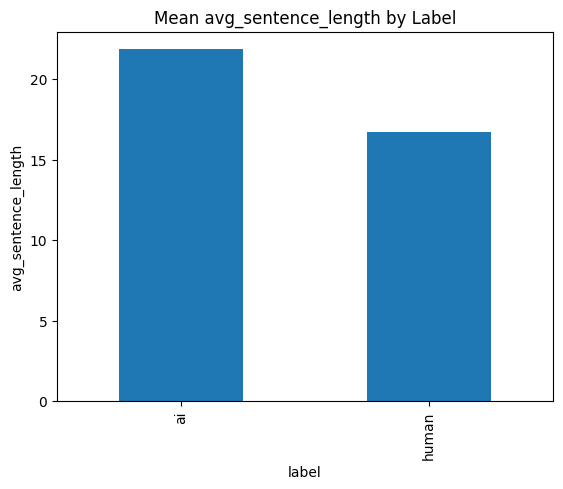

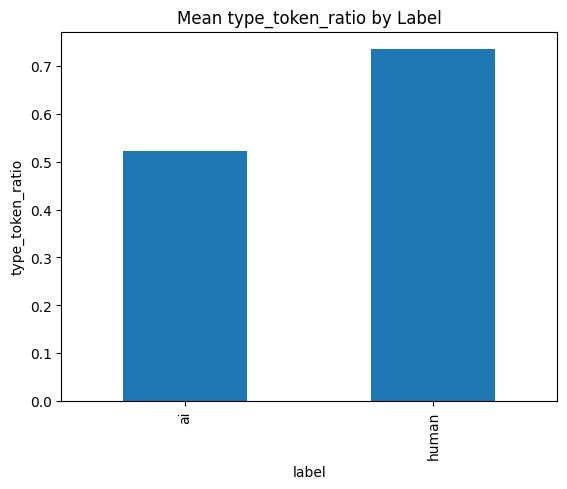

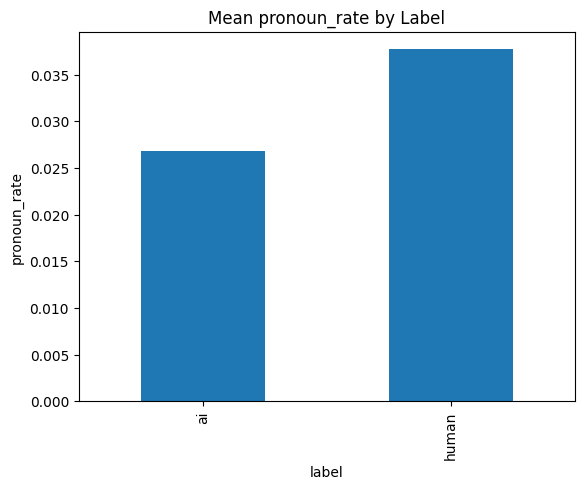

In [6]:
#Visualising the feature comparison
import matplotlib.pyplot as plt

features = ["avg_sentence_length", "type_token_ratio", "pronoun_rate"]

for f in features:
    df_with_features.groupby("label")[f].mean().plot(
        kind="bar", title=f"Mean {f} by Label", ylabel=f
    )
    plt.show()


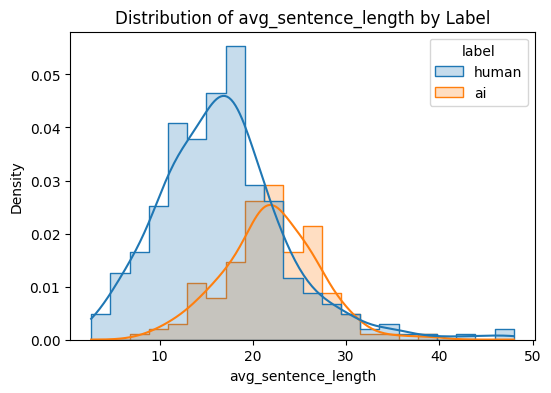

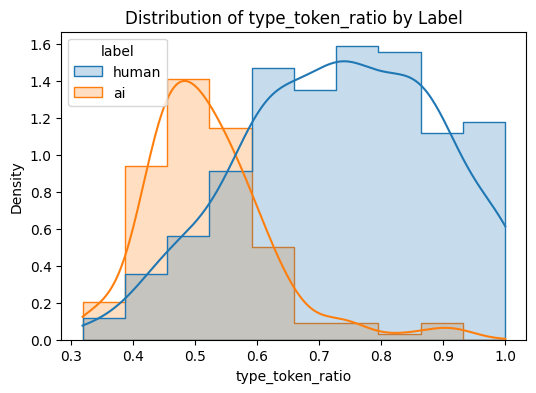

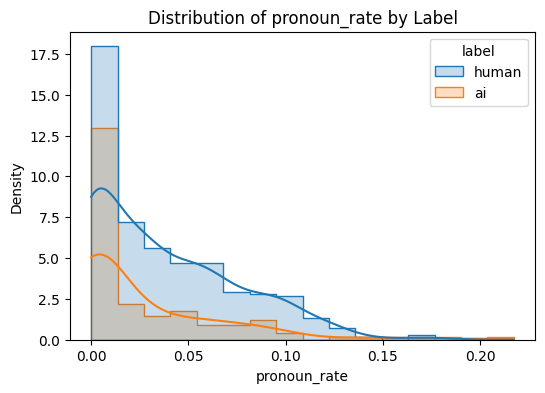

In [ ]:
# Exploring the distribution of features by label
import seaborn as sns

for f in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_with_features, x=f, hue="label", kde=True, element="step", stat="density")
    plt.title(f"Distribution of {f} by Label")
    plt.show()
